## 웹 크롤링 json

In [ ]:
## 와디즈 펀딩 - 펀딩하기 메뉴 가서 300개 정도
## 제목, 이미지 소스, 금액, 달성률, 남은 시간 정도 긁어오기
## 사실 한가지 데이터에 제목, 이미지 소스 등등 다 들어있을 거임

In [40]:
import requests
from bs4 import BeautifulSoup

In [71]:
url = "https://www.wadiz.kr/web/wreward/ajaxGetCardList?"
params = {
    "startNum" : 0,
    'limit' : 48,
    'order' : 'recommend',
    'endYn' : 'ALL'
}

resp = requests.get(url, headers = headers)
resp

<Response [200]>

In [92]:
menu = resp.json()
menu['data'][0]

{'campaignId': 112182,
 'title': '[1억 달성/앵콜] 뱃살은 잡아주고 허리는 보호해주는 버닝밴드',
 'coreMessage': '[1억 달성 마지막 펀딩] 올 여름은 자신있게!! 지몬이 제안하는 뱃살 관리 프로젝트. 특허 받은 제조방법을 만든 버닝밴드로 현명한 복부 관리를 시작해보세요!',
 'photoUrl': 'https://cdn1.wadiz.kr/images/20210428/1619590404329.png/wadiz/optimize',
 'photoThumbnail': 0,
 'photoThumbnailUrl': None,
 'nickName': '굿럭',
 'hostName': None,
 'encourageCnt': -1,
 'popularPoint': 0,
 'participationCnt': 161,
 'totalBackedAmount': 6231000,
 'achievementRate': 1246,
 'remainingDay': 25,
 'isAllOrNothing': 1,
 'endYn': 0,
 'userPhotoUrl': None,
 'isOpen': 1,
 'miniBoardCnt': 0,
 'isStandingBy': 0,
 'isSubmitted': 0,
 'userId': -1,
 'encUserId': 1120465604,
 'encIntUserId': 1120465604,
 'globalId': 0,
 'characterColor': None,
 'targetAmount': 0,
 'targetMessage': None,
 'hashKeyword': None,
 'campaignUpdateCnt': 0,
 'blurPhotoUrl': None,
 'blurCharacterColor': None,
 'custValueCode': 297,
 'custValueCodeNm': '스포츠·모빌리티',
 'whenOpen': '2021-05-13 17:01:12',
 'linkType': None,
 'link

In [93]:
page = 7
return_list = []


for i in range(page):
    title = menu['data'][i]['title']
    coreMessage = menu['data'][i]['coreMessage']
    totalBackedAmount = menu['data'][i]['totalBackedAmount']
    achievementRate = menu['data'][i]['achievementRate']
    
    return_list
    
return_list

TypeError: append() takes exactly one argument (4 given)

## 강사님 버젼

1. request 찾기(network)
2. request 보내고
3. response로 응답받은 것 확인 (json)
4. json ==> python 객체로 변환

In [96]:
base_url = "https://www.wadiz.kr/web/wreward/ajaxGetCardList?"
params = {
    'startNum' : 0,
    'limit' : 100, #기본은 48개까지 였지만 테스트를 통해 100개까지 가져올 수 있다는 걸 알아내서
    'order' : 'recommend',
    'endYn' : 'ALL',
    'keyword' : None # keyword는 안적어도 되긴 함
}

resp = requests.get(base_url, params=params)
resp

<Response [200]>

In [99]:
data = resp.json()
data

{'success': 'true',
 'code': 'SUSS000',
 'title': None,
 'message': '',
 'url': None,
 'additionalParams': {'totalCount': '10004'},
 'data': [{'campaignId': 110588,
   'title': '월7,900원! 특허로 키운 특별한 새싹!! 브로콜리&새싹보리분말',
   'coreMessage': '월7,900원 우리 가족 건강지키미! 7개의 특허기술로 재배~가공~판매까지 모두 다 한번에!! 누구나 믿고 먹을 수 있는 바른 먹거리를 파격적인 혜택으로 소개하고 싶습니다.',
   'photoUrl': 'https://cdn1.wadiz.kr/images/20210419/1618815648123.png/wadiz/optimize',
   'photoThumbnail': 0,
   'photoThumbnailUrl': None,
   'nickName': '농업회사법인 주식회사 유순',
   'hostName': None,
   'encourageCnt': -1,
   'popularPoint': 0,
   'participationCnt': 28,
   'totalBackedAmount': 763500,
   'achievementRate': 152,
   'remainingDay': 4,
   'isAllOrNothing': 1,
   'endYn': 0,
   'userPhotoUrl': None,
   'isOpen': 1,
   'miniBoardCnt': 0,
   'isStandingBy': 0,
   'isSubmitted': 0,
   'userId': -1,
   'encUserId': 5154137814,
   'encIntUserId': 859170518,
   'globalId': 0,
   'characterColor': None,
   'targetAmount': 0,
   'targetMessage': None,
  

In [100]:
# 우리가 필요한 건 data 딕셔너리중 'data'

300개 가져오기

In [105]:
base_url = "https://www.wadiz.kr/web/wreward/ajaxGetCardList?"
params = {
    'startNum' : 0,
    'limit' : 100, #기본은 48개까지 였지만 테스트를 통해 100개까지 가져올 수 있다는 걸 알아내서
    'order' : 'recommend',
    'endYn' : 'ALL',
    'keyword' : None # keyword는 안적어도 되긴 함
}

num = 300
num_per_request = 100

In [106]:
import math # 올림함수 ceil 사용하기 위해

In [107]:
result_list = []

for i in range(math.ceil(num / num_per_request)):
    params = {
    'startNum' : i * num_per_request,
    'limit' : num_per_request, #요청 하나에 100개씩 가져올거다
    'order' : 'recommend',
    'endYn' : 'ALL',
    'keyword' : None # keyword는 안적어도 되긴 함
    }
    
    resp = requests.get(base_url, params = params)
    resp_data = resp.json()
    result_list.extend(resp_data.get('data')) #딕셔너리에서 특정 key의 value를 가져오는 함수가 get
    
result_list

[{'campaignId': 112182,
  'title': '[1억 달성/앵콜] 뱃살은 잡아주고 허리는 보호해주는 버닝밴드',
  'coreMessage': '[1억 달성 마지막 펀딩] 올 여름은 자신있게!! 지몬이 제안하는 뱃살 관리 프로젝트. 특허 받은 제조방법을 만든 버닝밴드로 현명한 복부 관리를 시작해보세요!',
  'photoUrl': 'https://cdn1.wadiz.kr/images/20210428/1619590404329.png/wadiz/optimize',
  'photoThumbnail': 0,
  'photoThumbnailUrl': None,
  'nickName': '굿럭',
  'hostName': None,
  'encourageCnt': -1,
  'popularPoint': 0,
  'participationCnt': 162,
  'totalBackedAmount': 6304000,
  'achievementRate': 1260,
  'remainingDay': 25,
  'isAllOrNothing': 1,
  'endYn': 0,
  'userPhotoUrl': None,
  'isOpen': 1,
  'miniBoardCnt': 0,
  'isStandingBy': 0,
  'isSubmitted': 0,
  'userId': -1,
  'encUserId': 1400582005,
  'encIntUserId': 1400582005,
  'globalId': 0,
  'characterColor': None,
  'targetAmount': 0,
  'targetMessage': None,
  'hashKeyword': None,
  'campaignUpdateCnt': 0,
  'blurPhotoUrl': None,
  'blurCharacterColor': None,
  'custValueCode': 297,
  'custValueCodeNm': '스포츠·모빌리티',
  'whenOpen': '2021-05-13 1

In [110]:
type(resp_data)

dict

In [118]:
import pandas as pd
# 엑셀, 테이블 같은 2차원 데이터를 핸들링하기 위한 모듈
# R 에 있는 기능들을 파이썬으로 옮겼다고 생각하면 됨

In [119]:
pandas.__version__

'1.2.4'

In [120]:
pd.DataFrame

pandas.core.frame.DataFrame

In [121]:
df = pd.DataFrame(result_list) #크롤링 결과를 리스트 안에 딕셔너리로 넣은 이유를 확인 가능

In [127]:
df #리스트 안에 딕셔너리들이 테이블로 바뀜

,campaignId,title,coreMessage,photoUrl,photoThumbnail,photoThumbnailUrl,nickName,hostName,encourageCnt,popularPoint,...,incomeDeductYn,privateYn,eqCamStats,listCount,premiumYn,acid,advertisement,tu,openYear,main
0,112182,[1억 달성/앵콜] 뱃살은 잡아주고 허리는 보호해주는 버닝밴드,[1억 달성 마지막 펀딩] 올 여름은 자신있게!! 지몬이 제안하는 뱃살 관리 프로젝...,https://cdn1.wadiz.kr/images/20210428/16195904...,0,None,굿럭,None,-1,0,...,None,None,None,0,None,10008252,True,https://www.wadiz.kr/web/campaign/detail/11218...,None,False
1,105368,속부터 환하게 밝혀드릴게요. 비건 브랜드 앱솔룹의 1초 즉각 톤업 크림,"기존 톤업 크림의 백탁, 뭉침, 뻑뻑함으로 만족하지 못하셨죠? \nTT공법으로 촉촉...",https://cdn.wadiz.kr/wwwwadiz/green001/2021/05...,0,None,주식회사 더마룹,None,-1,0,...,None,None,None,0,None,0,False,None,None,False
2,104130,"[고기, 안구워도 돼요] 캠핑 바베큐를 즐기는 새로운 방법 '몽바'","불 관리하랴, 고기 뒤집으랴… 이런거 안해도 돼요. 달궈진 맥반석과 고기 넣고, 뚜...",https://cdn.wadiz.kr/wwwwadiz/green001/2021/04...,0,None,그랏토,None,-1,0,...,None,None,None,0,None,0,False,None,None,False
3,109403,"[평점4.7 / 앵콜 4,291%] 발명특허 기술력 ""지몬 손목보호대""",[우리 집 손목 지킴이] 발명특허 기술력과 미국FDA 안전성 검사 자석이 만났다고?...,https://cdn1.wadiz.kr/images/20210423/16191491...,0,None,굿럭,None,-1,0,...,None,None,None,0,None,10008175,True,https://www.wadiz.kr/web/campaign/detail/10940...,None,False
4,111064,[48시간 선착순] 본적없을걸? 맛있는 신개념 영양젤리 #밸런츄,"새콤달콤 구미젤리에, 5가지 필수 영양소를 꽉 채워 담았어요!\n영양소? 이제 억지...",https://cdn.wadiz.kr/wwwwadiz/green001/2021/05...,0,None,비바에볼루션 주식회사,None,-1,0,...,None,None,None,0,None,0,False,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,110862,한벌로 가볍게 떠나자!! 여행을 위한 [ALL-WAY 퍼포먼스 트랙팬츠],문밖을 나서는 순간 모든 레저에서 일상까지 [ALL-WAY 퍼포먼스 트랙팬츠]과 함...,https://cdn.wadiz.kr/wwwwadiz/green001/2021/04...,0,None,버디컴퍼니,None,-1,0,...,None,None,None,0,None,0,False,None,None,False
296,112089,꾸덕한 벚꽃꿀과 촉촉한 국산팥! 촉촉하고 쫀~득한 <창원벚꽃잎빵>,맛으로 피워내는 벚꽃진미! 달큰한 벚꽃꿀과 녹진한 수제 단팥의 조화. 옅게 흘러드는...,https://cdn.wadiz.kr/wwwwadiz/green001/2021/04...,0,None,윤현호,None,-1,0,...,None,None,None,0,None,0,False,None,None,False
297,111061,옆잠기? 이어폰을 착용하고도 옆잠이 편한 베개라구요?,바른 자세로 된다고만 해서 옆잠이 편안할까요?\n\n이어폰을 끼고도 옆잠이 편할만큼...,https://cdn.wadiz.kr/wwwwadiz/green001/2021/05...,0,None,(주)수코팩토리,None,-1,0,...,None,None,None,0,None,0,False,None,None,False
298,108604,"환경을 지키는 3분 습관, 칫솔부터 바꿔보세요! 대나무 치간칫솔,치실세트","지구를 사랑하는 마음을 가진 당신을 위한 NO 플라스틱, 생분해 되는 모소 대나무로...",https://cdn.wadiz.kr/wwwwadiz/green001/2021/05...,0,None,라이프앤어스 주식회사,None,-1,0,...,None,None,None,0,None,0,False,None,None,False


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   campaignId          300 non-null    int64 
 1   title               300 non-null    object
 2   coreMessage         300 non-null    object
 3   photoUrl            300 non-null    object
 4   photoThumbnail      300 non-null    int64 
 5   photoThumbnailUrl   0 non-null      object
 6   nickName            300 non-null    object
 7   hostName            0 non-null      object
 8   encourageCnt        300 non-null    int64 
 9   popularPoint        300 non-null    int64 
 10  participationCnt    300 non-null    int64 
 11  totalBackedAmount   300 non-null    int64 
 12  achievementRate     300 non-null    int64 
 13  remainingDay        300 non-null    int64 
 14  isAllOrNothing      300 non-null    int64 
 15  endYn               300 non-null    int64 
 16  userPhotoUrl        0 non-

In [135]:
# csv 파일 열었는데 글자 깨질 경우 아래 입력
# windows : utf-8-sig

df.to_csv("wadiz.csv", encoding = 'utf-8-sig') #데이터프레임을 csv로 보낸다
#csv : comma separated view

In [138]:
df2 = pd.read_csv('wadiz.csv', index_col = 0) #csv 파일을 읽어오는 것도 가능
df2

,campaignId,title,coreMessage,photoUrl,photoThumbnail,photoThumbnailUrl,nickName,hostName,encourageCnt,popularPoint,...,incomeDeductYn,privateYn,eqCamStats,listCount,premiumYn,acid,advertisement,tu,openYear,main
0,112182,[1억 달성/앵콜] 뱃살은 잡아주고 허리는 보호해주는 버닝밴드,[1억 달성 마지막 펀딩] 올 여름은 자신있게!! 지몬이 제안하는 뱃살 관리 프로젝...,https://cdn1.wadiz.kr/images/20210428/16195904...,0,NaN,굿럭,NaN,-1,0,...,NaN,NaN,NaN,0,NaN,10008252,True,https://www.wadiz.kr/web/campaign/detail/11218...,NaN,False
1,105368,속부터 환하게 밝혀드릴게요. 비건 브랜드 앱솔룹의 1초 즉각 톤업 크림,"기존 톤업 크림의 백탁, 뭉침, 뻑뻑함으로 만족하지 못하셨죠? \nTT공법으로 촉촉...",https://cdn.wadiz.kr/wwwwadiz/green001/2021/05...,0,NaN,주식회사 더마룹,NaN,-1,0,...,NaN,NaN,NaN,0,NaN,0,False,NaN,NaN,False
2,104130,"[고기, 안구워도 돼요] 캠핑 바베큐를 즐기는 새로운 방법 '몽바'","불 관리하랴, 고기 뒤집으랴… 이런거 안해도 돼요. 달궈진 맥반석과 고기 넣고, 뚜...",https://cdn.wadiz.kr/wwwwadiz/green001/2021/04...,0,NaN,그랏토,NaN,-1,0,...,NaN,NaN,NaN,0,NaN,0,False,NaN,NaN,False
3,109403,"[평점4.7 / 앵콜 4,291%] 발명특허 기술력 ""지몬 손목보호대""",[우리 집 손목 지킴이] 발명특허 기술력과 미국FDA 안전성 검사 자석이 만났다고?...,https://cdn1.wadiz.kr/images/20210423/16191491...,0,NaN,굿럭,NaN,-1,0,...,NaN,NaN,NaN,0,NaN,10008175,True,https://www.wadiz.kr/web/campaign/detail/10940...,NaN,False
4,111064,[48시간 선착순] 본적없을걸? 맛있는 신개념 영양젤리 #밸런츄,"새콤달콤 구미젤리에, 5가지 필수 영양소를 꽉 채워 담았어요!\n영양소? 이제 억지...",https://cdn.wadiz.kr/wwwwadiz/green001/2021/05...,0,NaN,비바에볼루션 주식회사,NaN,-1,0,...,NaN,NaN,NaN,0,NaN,0,False,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,110862,한벌로 가볍게 떠나자!! 여행을 위한 [ALL-WAY 퍼포먼스 트랙팬츠],문밖을 나서는 순간 모든 레저에서 일상까지 [ALL-WAY 퍼포먼스 트랙팬츠]과 함...,https://cdn.wadiz.kr/wwwwadiz/green001/2021/04...,0,NaN,버디컴퍼니,NaN,-1,0,...,NaN,NaN,NaN,0,NaN,0,False,NaN,NaN,False
296,112089,꾸덕한 벚꽃꿀과 촉촉한 국산팥! 촉촉하고 쫀~득한 <창원벚꽃잎빵>,맛으로 피워내는 벚꽃진미! 달큰한 벚꽃꿀과 녹진한 수제 단팥의 조화. 옅게 흘러드는...,https://cdn.wadiz.kr/wwwwadiz/green001/2021/04...,0,NaN,윤현호,NaN,-1,0,...,NaN,NaN,NaN,0,NaN,0,False,NaN,NaN,False
297,111061,옆잠기? 이어폰을 착용하고도 옆잠이 편한 베개라구요?,바른 자세로 된다고만 해서 옆잠이 편안할까요?\n\n이어폰을 끼고도 옆잠이 편할만큼...,https://cdn.wadiz.kr/wwwwadiz/green001/2021/05...,0,NaN,(주)수코팩토리,NaN,-1,0,...,NaN,NaN,NaN,0,NaN,0,False,NaN,NaN,False
298,108604,"환경을 지키는 3분 습관, 칫솔부터 바꿔보세요! 대나무 치간칫솔,치실세트","지구를 사랑하는 마음을 가진 당신을 위한 NO 플라스틱, 생분해 되는 모소 대나무로...",https://cdn.wadiz.kr/wwwwadiz/green001/2021/05...,0,NaN,라이프앤어스 주식회사,NaN,-1,0,...,NaN,NaN,NaN,0,NaN,0,False,NaN,NaN,False


In [140]:
!pip install openpyxl

In [142]:
df.to_excel("wadiz.xlsx", encoding = 'utf-8-sig')

In [144]:
df3 = pd.read_excel("wadiz.xlsx", index_col = 0)
df3

,campaignId,title,coreMessage,photoUrl,photoThumbnail,photoThumbnailUrl,nickName,hostName,encourageCnt,popularPoint,...,incomeDeductYn,privateYn,eqCamStats,listCount,premiumYn,acid,advertisement,tu,openYear,main
0,112182,[1억 달성/앵콜] 뱃살은 잡아주고 허리는 보호해주는 버닝밴드,[1억 달성 마지막 펀딩] 올 여름은 자신있게!! 지몬이 제안하는 뱃살 관리 프로젝...,https://cdn1.wadiz.kr/images/20210428/16195904...,0,NaN,굿럭,NaN,-1,0,...,NaN,NaN,NaN,0,NaN,10008252,True,https://www.wadiz.kr/web/campaign/detail/11218...,NaN,False
1,105368,속부터 환하게 밝혀드릴게요. 비건 브랜드 앱솔룹의 1초 즉각 톤업 크림,"기존 톤업 크림의 백탁, 뭉침, 뻑뻑함으로 만족하지 못하셨죠? \nTT공법으로 촉촉...",https://cdn.wadiz.kr/wwwwadiz/green001/2021/05...,0,NaN,주식회사 더마룹,NaN,-1,0,...,NaN,NaN,NaN,0,NaN,0,False,NaN,NaN,False
2,104130,"[고기, 안구워도 돼요] 캠핑 바베큐를 즐기는 새로운 방법 '몽바'","불 관리하랴, 고기 뒤집으랴… 이런거 안해도 돼요. 달궈진 맥반석과 고기 넣고, 뚜...",https://cdn.wadiz.kr/wwwwadiz/green001/2021/04...,0,NaN,그랏토,NaN,-1,0,...,NaN,NaN,NaN,0,NaN,0,False,NaN,NaN,False
3,109403,"[평점4.7 / 앵콜 4,291%] 발명특허 기술력 ""지몬 손목보호대""",[우리 집 손목 지킴이] 발명특허 기술력과 미국FDA 안전성 검사 자석이 만났다고?...,https://cdn1.wadiz.kr/images/20210423/16191491...,0,NaN,굿럭,NaN,-1,0,...,NaN,NaN,NaN,0,NaN,10008175,True,https://www.wadiz.kr/web/campaign/detail/10940...,NaN,False
4,111064,[48시간 선착순] 본적없을걸? 맛있는 신개념 영양젤리 #밸런츄,"새콤달콤 구미젤리에, 5가지 필수 영양소를 꽉 채워 담았어요!\n영양소? 이제 억지...",https://cdn.wadiz.kr/wwwwadiz/green001/2021/05...,0,NaN,비바에볼루션 주식회사,NaN,-1,0,...,NaN,NaN,NaN,0,NaN,0,False,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,110862,한벌로 가볍게 떠나자!! 여행을 위한 [ALL-WAY 퍼포먼스 트랙팬츠],문밖을 나서는 순간 모든 레저에서 일상까지 [ALL-WAY 퍼포먼스 트랙팬츠]과 함...,https://cdn.wadiz.kr/wwwwadiz/green001/2021/04...,0,NaN,버디컴퍼니,NaN,-1,0,...,NaN,NaN,NaN,0,NaN,0,False,NaN,NaN,False
296,112089,꾸덕한 벚꽃꿀과 촉촉한 국산팥! 촉촉하고 쫀~득한 <창원벚꽃잎빵>,맛으로 피워내는 벚꽃진미! 달큰한 벚꽃꿀과 녹진한 수제 단팥의 조화. 옅게 흘러드는...,https://cdn.wadiz.kr/wwwwadiz/green001/2021/04...,0,NaN,윤현호,NaN,-1,0,...,NaN,NaN,NaN,0,NaN,0,False,NaN,NaN,False
297,111061,옆잠기? 이어폰을 착용하고도 옆잠이 편한 베개라구요?,바른 자세로 된다고만 해서 옆잠이 편안할까요?\n\n이어폰을 끼고도 옆잠이 편할만큼...,https://cdn.wadiz.kr/wwwwadiz/green001/2021/05...,0,NaN,(주)수코팩토리,NaN,-1,0,...,NaN,NaN,NaN,0,NaN,0,False,NaN,NaN,False
298,108604,"환경을 지키는 3분 습관, 칫솔부터 바꿔보세요! 대나무 치간칫솔,치실세트","지구를 사랑하는 마음을 가진 당신을 위한 NO 플라스틱, 생분해 되는 모소 대나무로...",https://cdn.wadiz.kr/wwwwadiz/green001/2021/05...,0,NaN,라이프앤어스 주식회사,NaN,-1,0,...,NaN,NaN,NaN,0,NaN,0,False,NaN,NaN,False


## json 모듈

In [146]:
resp.text #str타입

'{"success":"true","code":"SUSS000","title":null,"message":"","url":null,"additionalParams":{"totalCount":"10004"},"data":[{"campaignId":106370,"title":"제2의 일론머스크 바로 나!ㅣ당당하게 덕밍아웃 귀염뽀짝 키덜트 토이 로빗","coreMessage":"눈치 보지말고 취미를 즐기세요! [슬기로운 집콕생활] 칭찬듣는 키덜트 아이템, 제 2의 일론 머스크를 만들어줄 움직이는 종이로봇, 로빗을 소개합니다!","photoUrl":"https://cdn.wadiz.kr/wwwwadiz/green001/2021/0405/20210405102828406_106370.jpg/wadiz/format/jpg/quality/80/optimize","photoThumbnail":0,"photoThumbnailUrl":null,"nickName":"주식회사 로보트리","hostName":null,"encourageCnt":-1,"popularPoint":0,"participationCnt":66,"totalBackedAmount":2430700,"achievementRate":243,"remainingDay":18,"isAllOrNothing":1,"endYn":0,"userPhotoUrl":null,"isOpen":1,"miniBoardCnt":0,"isStandingBy":0,"isSubmitted":0,"userId":-1,"encUserId":4247953519,"encIntUserId":-47013777,"globalId":0,"characterColor":null,"targetAmount":0,"targetMessage":null,"hashKeyword":null,"campaignUpdateCnt":0,"blurPhotoUrl":null,"blurCharacterColor":null,"custValueCode":290,"custValueCodeNm":"

In [151]:
data = "sample(" + resp.text + ")" #노이즈가 끼게 만듦

In [152]:
data

'sample({"success":"true","code":"SUSS000","title":null,"message":"","url":null,"additionalParams":{"totalCount":"10004"},"data":[{"campaignId":106370,"title":"제2의 일론머스크 바로 나!ㅣ당당하게 덕밍아웃 귀염뽀짝 키덜트 토이 로빗","coreMessage":"눈치 보지말고 취미를 즐기세요! [슬기로운 집콕생활] 칭찬듣는 키덜트 아이템, 제 2의 일론 머스크를 만들어줄 움직이는 종이로봇, 로빗을 소개합니다!","photoUrl":"https://cdn.wadiz.kr/wwwwadiz/green001/2021/0405/20210405102828406_106370.jpg/wadiz/format/jpg/quality/80/optimize","photoThumbnail":0,"photoThumbnailUrl":null,"nickName":"주식회사 로보트리","hostName":null,"encourageCnt":-1,"popularPoint":0,"participationCnt":66,"totalBackedAmount":2430700,"achievementRate":243,"remainingDay":18,"isAllOrNothing":1,"endYn":0,"userPhotoUrl":null,"isOpen":1,"miniBoardCnt":0,"isStandingBy":0,"isSubmitted":0,"userId":-1,"encUserId":4247953519,"encIntUserId":-47013777,"globalId":0,"characterColor":null,"targetAmount":0,"targetMessage":null,"hashKeyword":null,"campaignUpdateCnt":0,"blurPhotoUrl":null,"blurCharacterColor":null,"custValueCode":290,"custValueCo

In [153]:
#노이즈가 낀 data는 resp.json()이 안먹음

In [154]:
import json

json을 python 객체로 만들기

json.loads

In [156]:
import json
target = data[7:-1] # 앞에 sample( 걷어내고 마지막에 ) 걷어냄. 딱 그 안에 있는 것만 json
target

'{"success":"true","code":"SUSS000","title":null,"message":"","url":null,"additionalParams":{"totalCount":"10004"},"data":[{"campaignId":106370,"title":"제2의 일론머스크 바로 나!ㅣ당당하게 덕밍아웃 귀염뽀짝 키덜트 토이 로빗","coreMessage":"눈치 보지말고 취미를 즐기세요! [슬기로운 집콕생활] 칭찬듣는 키덜트 아이템, 제 2의 일론 머스크를 만들어줄 움직이는 종이로봇, 로빗을 소개합니다!","photoUrl":"https://cdn.wadiz.kr/wwwwadiz/green001/2021/0405/20210405102828406_106370.jpg/wadiz/format/jpg/quality/80/optimize","photoThumbnail":0,"photoThumbnailUrl":null,"nickName":"주식회사 로보트리","hostName":null,"encourageCnt":-1,"popularPoint":0,"participationCnt":66,"totalBackedAmount":2430700,"achievementRate":243,"remainingDay":18,"isAllOrNothing":1,"endYn":0,"userPhotoUrl":null,"isOpen":1,"miniBoardCnt":0,"isStandingBy":0,"isSubmitted":0,"userId":-1,"encUserId":4247953519,"encIntUserId":-47013777,"globalId":0,"characterColor":null,"targetAmount":0,"targetMessage":null,"hashKeyword":null,"campaignUpdateCnt":0,"blurPhotoUrl":null,"blurCharacterColor":null,"custValueCode":290,"custValueCodeNm":"

In [157]:
data = json.loads(target)
data

{'success': 'true',
 'code': 'SUSS000',
 'title': None,
 'message': '',
 'url': None,
 'additionalParams': {'totalCount': '10004'},
 'data': [{'campaignId': 106370,
   'title': '제2의 일론머스크 바로 나!ㅣ당당하게 덕밍아웃 귀염뽀짝 키덜트 토이 로빗',
   'coreMessage': '눈치 보지말고 취미를 즐기세요! [슬기로운 집콕생활] 칭찬듣는 키덜트 아이템, 제 2의 일론 머스크를 만들어줄 움직이는 종이로봇, 로빗을 소개합니다!',
   'photoUrl': 'https://cdn.wadiz.kr/wwwwadiz/green001/2021/0405/20210405102828406_106370.jpg/wadiz/format/jpg/quality/80/optimize',
   'photoThumbnail': 0,
   'photoThumbnailUrl': None,
   'nickName': '주식회사 로보트리',
   'hostName': None,
   'encourageCnt': -1,
   'popularPoint': 0,
   'participationCnt': 66,
   'totalBackedAmount': 2430700,
   'achievementRate': 243,
   'remainingDay': 18,
   'isAllOrNothing': 1,
   'endYn': 0,
   'userPhotoUrl': None,
   'isOpen': 1,
   'miniBoardCnt': 0,
   'isStandingBy': 0,
   'isSubmitted': 0,
   'userId': -1,
   'encUserId': 4247953519,
   'encIntUserId': -47013777,
   'globalId': 0,
   'characterColor': None,
   'targetAmount':

python 객체를 json으로 만들기

In [158]:
json_data = json.dumps(data)
json_data

'{"success": "true", "code": "SUSS000", "title": null, "message": "", "url": null, "additionalParams": {"totalCount": "10004"}, "data": [{"campaignId": 106370, "title": "\\uc81c2\\uc758 \\uc77c\\ub860\\uba38\\uc2a4\\ud06c \\ubc14\\ub85c \\ub098!\\u3163\\ub2f9\\ub2f9\\ud558\\uac8c \\ub355\\ubc0d\\uc544\\uc6c3 \\uadc0\\uc5fc\\ubf40\\uc9dd \\ud0a4\\ub35c\\ud2b8 \\ud1a0\\uc774 \\ub85c\\ube57", "coreMessage": "\\ub208\\uce58 \\ubcf4\\uc9c0\\ub9d0\\uace0 \\ucde8\\ubbf8\\ub97c \\uc990\\uae30\\uc138\\uc694! [\\uc2ac\\uae30\\ub85c\\uc6b4 \\uc9d1\\ucf55\\uc0dd\\ud65c] \\uce6d\\ucc2c\\ub4e3\\ub294 \\ud0a4\\ub35c\\ud2b8 \\uc544\\uc774\\ud15c, \\uc81c 2\\uc758 \\uc77c\\ub860 \\uba38\\uc2a4\\ud06c\\ub97c \\ub9cc\\ub4e4\\uc5b4\\uc904 \\uc6c0\\uc9c1\\uc774\\ub294 \\uc885\\uc774\\ub85c\\ubd07, \\ub85c\\ube57\\uc744 \\uc18c\\uac1c\\ud569\\ub2c8\\ub2e4!", "photoUrl": "https://cdn.wadiz.kr/wwwwadiz/green001/2021/0405/20210405102828406_106370.jpg/wadiz/format/jpg/quality/80/optimize", "photoThumbnail": 0, 

## selenium

셀레늄은 웹브라우저를 직접 핸들링, 파싱

In [159]:
!pip install selenium

In [160]:
from selenium import webdriver
driver = webdriver.Chrome("./chromedriver.exe")
driver.get("https://www.naver.com")

webdriver 열기

In [166]:
driver = webdriver.Chrome("./chromedriver.exe") # 지금 쥬피터 파일 경로와 같기 때문에 바로 ./chromedriver.exe
# ./ 는 현재 경로를 의미
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="fe6eeb223a560669da9a1463037ca839")>

In [167]:
driver.get("https://www.naver.com")

In [170]:
nav_items = driver.find_elements_by_class_name('nav_item')
nav_items

WebDriverException: Message: chrome not reachable
  (Session info: chrome=90.0.4430.212)


In [172]:
sample_elem = driver.find_elements_by_class_name('apple')

WebDriverException: Message: chrome not reachable
  (Session info: chrome=90.0.4430.212)


In [173]:
sample_elem2 = driver.find_element_by_class_name('apple')

WebDriverException: Message: chrome not reachable
  (Session info: chrome=90.0.4430.212)


In [175]:
driver.get('https://www.wadiz.kr')

WebDriverException: Message: chrome not reachable
  (Session info: chrome=90.0.4430.212)


## API 실습

In [1]:
from selenium import webdriver
driver = webdriver.Chrome("./chromedriver.exe")
driver.get("https://www.naver.com")

In [2]:
nav_elems = driver.find_elements_by_class_name('nav')
len(nav_elems)

16

## instance attributes

In [3]:
target_elem = nav_elems[-1]
target_elem

<selenium.webdriver.remote.webelement.WebElement (session="bd80256477acdff1075b2b67f165188b", element="ff0121a2-8287-4c68-b14c-15a1f16f99b1")>

#### text

In [4]:
target_elem.text

'웹툰'

#### get_attribute

In [5]:
url = target_elem.get_attribute('href')
url

'https://comic.naver.com/'

## find_element

In [8]:
weather_elem = driver.find_element_by_id('NM_WEATHER')
weather_elem

<selenium.webdriver.remote.webelement.WebElement (session="bd80256477acdff1075b2b67f165188b", element="520ce811-41be-4d05-bb11-e945fd237ddb")>

#### find_element(s)_by_xpath

In [10]:
comic_elem = driver.find_element_by_xpath('//*[@id="NM_FAVORITE"]/div[1]/ul[2]/li[8]/a')
# 개발자도구에서 copy xpath
comic_elem

<selenium.webdriver.remote.webelement.WebElement (session="bd80256477acdff1075b2b67f165188b", element="ff0121a2-8287-4c68-b14c-15a1f16f99b1")>

In [11]:
comic_elem.text

'웹툰'

## find_element(s)_by_link_text

In [12]:
comic_elem = driver.find_element_by_link_text("웹툰")
comic_elem

<selenium.webdriver.remote.webelement.WebElement (session="bd80256477acdff1075b2b67f165188b", element="ff0121a2-8287-4c68-b14c-15a1f16f99b1")>

## find_element(s)_by_tag_name

In [14]:
a_elems = driver.find_element_by_tag_name('a')
a_elems

<selenium.webdriver.remote.webelement.WebElement (session="bd80256477acdff1075b2b67f165188b", element="74007531-8fc7-4ed1-ab1e-54c82a587840")>

In [15]:
len(a_elems)

TypeError: object of type 'WebElement' has no len()

# 브라우저 핸들링

In [16]:
driver.maximize_window()

In [17]:
driver.get_window_size()

{'width': 1051, 'height': 806}

In [18]:
driver.get_screenshot_as_png()

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\xcb\x00\x00\x03x\x08\x06\x00\x00\x00\xdd\x94o\xf7\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00 \x00IDATx\x9c\xec\xbdy\xacf\xe9]\xe7\xf7y\x96\xb3\xbd\xfb{\xb7\xba\xb7\xaak\xe9n\xf7\xe2\xad1\x8e\r\x06g\x80\x81\x11\x1a\t\x05)\x12$3\x99\x10\x10\n\x8af\x86\x89\x84@If&\xf3G\xa4@\x82\x04\x1a\r\x19\t\x12&\x1eyH&\x04\x93\x05\xb7<Q\x1c\x083\xcc\x18\x82\x8d\xc1\xc6v/\xee\xbd\xb6[w\x7f\xf7\xb3=K\xfe8\xe7}\xef\xad\xea\xeav\x1bwW\xb5\xdd\xe7\xd3*\xdd\xba\xef\xfa\xbc\xcf9oI\xe7\xd3\xbf\xdf\xf7\'\xae\xef\xeey\xce\xe0\xbd\xc7\x18\xc3\xc1\xd1\x01\x9f\xfb\xc2\x9f\xf0\xe9\xdf\xfd\x7f9\x99\xcd\xf0H\xacu8[=\xdc:\xcbl6\xc3\x1aK\xaf\x15\xb3\x1e)~\xe8\xe1-\xfe\xad\xf7?\xce\xc6\xf6\x0eA\xa8\xc0:\xa4\x14\xf8\xb2 Og\xcc\xa6#NNNx\xe9\xd6\x11\x9fzj\x97/\xeeN\xc8\x8d\xc3{\x87R\x8a\x8b\x17\xb6\xd0q\xcc\x83\x0f=\xc4O\xfd\xc8_\xa3\xd7m\xa3\x95FH\x01\x02\x04\x02)\x15\x1e@\x08\xae]\xbb\xc6\x0f~\xff\xf7\xf1\xe8c\xef%\x0c#\x1a\xee\xcel6\xe5\xe6\x8d\x97\xf8+\x1f}\x1c)%\xc

In [19]:
driver.save_screenshot('naver.png')

True

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36"><head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/e
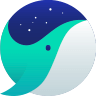
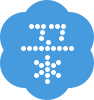

In [20]:
driver.page_source

## back & forward()

In [21]:
driver.get("https://comic.naver.com")

In [22]:
driver.back()

In [23]:
driver.forward()

## Event 발생시키기

In [24]:
driver.get('https://www.naver.com')

In [26]:
query_input = driver.find_element_by_id('query')
query_input

<selenium.webdriver.remote.webelement.WebElement (session="bd80256477acdff1075b2b67f165188b", element="3a8f1d93-05b1-42b8-8dd3-5275916ef547")>

In [27]:
query_input.send_keys("기생충")

In [28]:
search_btn = driver.find_element_by_id('search_btn')
search_btn.click()

## 실습.selenium을 이용.
https://pedia.watcha.com/ 에 접속하여, 기생충을 검색하고 overview 크롤링

In [1]:
from selenium import webdriver
driver = webdriver.Chrome("./chromedriver.exe")

In [2]:
driver.get('https://pedia.watcha.com')

In [5]:
search_input = driver.find_element_by_class_name('css-5yhihc')
search_input

<selenium.webdriver.remote.webelement.WebElement (session="d712c0a107da5fabe96d9e2c9af685fd", element="dd441bb1-c051-4b55-b7de-acc48cb994fb")>

In [9]:
search_input.send_keys("기생충")

In [16]:
from selenium.webdriver.common.keys import Keys
search_input.send_keys(Keys.ENTER)

In [19]:
parasite = driver.find_element_by_class_name('css-1qmeemv')
parasite.click()

In [21]:
overview = driver.find_element_by_class_name('css-1tywu13')
overview

<selenium.webdriver.remote.webelement.WebElement (session="d712c0a107da5fabe96d9e2c9af685fd", element="fdf58767-ddf6-4938-92f7-cc44f589d782")>

In [22]:
overview.text

"Overview\nMore\n기생충\n2019 · Korea · Drama\n2h 11m\nAll unemployed, Ki-taek's family takes peculiar interest in the Parks for their livelihood until they get entangled in an expected incident."

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
driver = webdriver.Chrome("./chromedriver.exe")
driver.get('https://pedia.watcha.com')
search_input = driver.find_element_by_class_name('css-5yhihc')
search_input.send_keys("기생충")
search_input.send_keys(Keys.ENTER)
parasite = driver.find_element_by_class_name('css-1qmeemv')
parasite.click()
overview = driver.find_element_by_class_name('css-1tywu13')
overview.text

# 이렇게 한 셀에 다 입력해서 실행하면 에러 발생함. 셀레늄의 단점


## 해결법1(?)

### sleep 함수 사용?

In [24]:
from time import sleep
print("잠자기")
sleep(5) #잠자기 출력 후 5초 기다렸다가 잠에서 깨기 출력함
print("잠에서 깨기")

잠자기
잠에서 깨기


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
driver = webdriver.Chrome("./chromedriver.exe")
driver.get('https://pedia.watcha.com')
search_input = driver.find_element_by_class_name('css-5yhihc')
search_input.send_keys("기생충")
search_input.send_keys(Keys.ENTER)
sleep(3) # 조금 기다리게 함
parasite = driver.find_element_by_class_name('css-1qmeemv')
parasite.click()
overview = driver.find_element_by_class_name('css-1tywu13')
overview.text

## 해결법2(?) implicitly_wait

### 최대 몇 초 줄건데 그 안에 니가 찾았으면 더 기다리지 말고 그냥 실행시켜

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome("./chromedriver.exe")

driver.implicitly_wait(10) # 넉넉하게 10초 줄건데 그거보다 빨리 찾으면 진행해
#driver는 객체. implicitly_wait는 그 안의 instance method

driver.get('https://pedia.watcha.com')
search_input = driver.find_element_by_class_name('css-5yhihc')
search_input.send_keys("기생충")
search_input.send_keys(Keys.ENTER)
parasite = driver.find_element_by_class_name('css-1qmeemv')
parasite.click()
overview = driver.find_element_by_class_name('css-1tywu13')
overview.text

## 웹 크롤링이 합법인가 불법인가?

robots.txt 참조
robots.txt 가 아예 없으면 관례적으로 ok

근데 robots.txt 가 법적 효력은 없고 일종의 문화

## REST API